# Clase 00: Preámbulo matemático

## Indice
- Preambulo
    - Linealidad
    - Algebra Lineal
        - Vectores y Matrices
        - Producto interno
            - producto interno vs producto punto 
            - Proyección
    - Calculo
        - Derivada en una dimension
        - Regla de la cadena
        - Derivadas parciales
        - Gradiente
    - Optimización
        - Minimización/Maximización a traves de derivadas
            - 1 D
        - Minimización/Maximización a traves de derivadas parciales
            - 2D+ (Gradiente como aparece y se usa)
    


## Preámbulo

### Linealidad

Definición (1):
un mapa $f: U \rightarrow V$, donde $U$ y $V$ son espacios vectoriales, se denomina lineal si cumple con las siguientes propiedades:
1. Dado $\mathbf{x}$, $\mathbf{y}\in U$: $f(x+y) = f(x) + f(y)$
2. Dado $\alpha \in \mathbb{R}$: $f(\alpha x) = \alpha f(x)$
3. Corolario: $f(0_{U}) = 0_{V}$

In [25]:
def f(x: int):
    return 2*x

print (f"f(3 + 2) = f(3) + f(2) =>  {f(3+2)} = {f(3)} + {f(2)}")


f(3 + 2) = f(3) + f(2) =>  10 = 6 + 4


In [26]:
def f(x):
    return x**2
print (f"f(3 + 2) != f(3) + f(2) =>  {f(3+2)} != {f(3)} + {f(2)}")

f(3 + 2) != f(3) + f(2) =>  25 != 9 + 4


## Algebra Lineal

### Vectores y Matrices

Los vectores y matrices son elementos fundamentales del algebra lineal.
Para poder desarrollar el curso de Deep Learning necesitaremos responder estas tres preguntas:
- como se operan estos objetos?
- que propiedades tienen?
- que representan en terminos de información? o porque se utilizan para representar datos?

Los Vectores y Matrices se utilizan bajo el contexto de espacio vectorial real (Utilizaremos numeros reales $\mathbb{R}$)
Un espacio para considerase vectorial debe cumplir con 10 axiomas:

1. Cerradura bajo la suma: si $\mathbf{x} \in V$ y  $\mathbf{y} \in V$ entonces $\mathbf{x} + \mathbf{y} \in V$
2. Asociatividad de la suma de vectores: $(\mathbf{x} + \mathbf{y}) + \mathbf{z} = \mathbf{x} + (\mathbf{y} + \mathbf{z})$
3. Existe un vector/matriz $0$ tal que para todo $\mathbf{x} \in V$, $\mathbf{x} + 0 = 0 + \mathbf{x} = \mathbf{x}$
4. Conmutatividad de la suma de vectores: $\mathbf{x} + \mathbf{y} = \mathbf{y} + \mathbf{x}$
5. Cerradura en la multiplicación de escalares: $\alpha \cdot \mathbf{x} \in V$, tal que $\alpha \in \mathbb{R}$ y $\mathbf{x} \in V$
6. Distribucion de suma de escalares: $(\alpha + \beta) \cdot \mathbf{x} = \alpha \cdot \mathbf{x} + \beta \cdot \mathbf{x}$ tal que $\alpha$ , $\beta \in \mathbb{R}$, y $\mathbf{x} \in V$
7. Distribución de suma vectorial: $\alpha \cdot (\mathbf{x} + \mathbf{y}) = \alpha \cdot \mathbf{x} + \alpha \cdot \mathbf{y}$ tal que $\alpha \in \mathbb{R}$, y $\mathbf{x}$, $\mathbf{y} \in V$
8. Distribución de escalares: $\alpha \cdot (\beta + \gamma) = \alpha \cdot \beta + \alpha \cdot \gamma$ tal que $\alpha, \beta, \gamma \in \mathbb{R}$.
9. Ley asociativa de multiplicacion por escalares: $\alpha \cdot (\beta \cdot \mathbf{x}) = (\alpha \cdot \beta) \cdot \mathbf{x}$ tal que $\alpha, \beta \in \mathbb{R}$, y $\mathbf{x} \in V$
10. Identico multiplicativo escalar: para cada vector $\mathbf{x} \in V$, 1 $\cdot \mathbf{x} = \mathbf{x}$ tal que $\mathbf{x} \in V$

Ej:
- El espacio de vectores de dimension $n$, tambien escrito como $\mathbb{R}^{n}$ cumple con los axiomas
- El espacio de Matrices de dimension $n \times n$, tambien escrito como $\mathbb{R}^{n \times n}$ cumple con los axiomas

Las Matrices se pueden pensar como funciones lineales, es decir cumplen con la definicion de linealidad vista anteriormente.
La librería de ```python``` que permite trabajar con definiciones y operaciones del álgebra lineal se llama ```numpy```

In [27]:
import numpy as np
def f(x: np.array):
    m = np.array([[1,2],[3,4]])
    return m@x

x = np.array([[1], [1]])
y = np.array([[-1], [-1]])

print(f"f(x+y) = f(x) + f(y)")
print(f"{f(x+y)}")
print(f"f(x):\n {f(x)}")
print(f"f(y):\n {f(y)}")
# Imprimir bonito

f(x+y) = f(x) + f(y)
[[0]
 [0]]
f(x):
 [[3]
 [7]]
f(y):
 [[-3]
 [-7]]


#### Operaciones sobre vectores y matrices

- Las matrices son funciones que transforman nuestros vectores, son mapas lineales. Una matriz $A\in \mathbb{R}^{m\times n}$ transforma un vector $\mathbf{x}\in \mathbb{R}^{n}$ a un nuevo vector $\mathbf{y} \in  \mathbb{R}^{m}$ a través de la operación $M\mathbf{x}$ llamada producto matriz vector.
- Las matrices ademas contienen información de nuestros datos (mas adelante veremos como los datos son representados en la matriz)
- Existen maneras de caracterizar las matrices para medir la cantidad de información que poseen:
    - Tamaño: Se mide a traves de la norma matricial.
    - Cantidad de información: Se puede tener una nocion de la cantidad de información contando la cantidad de auto valores diferentes de cero.
    - ¿Cómo una matriz transforma un vector?: se puede saber como una matriz estire/comprime o rota a un vector a traves de sus espacios fundamentales (SVD)
 
Por ahora nos interesa entender como se hacen las operaciones fundamentales entre vectores y matrices:
1. Suma de matrices
2. Suma de vectores
3. Multiplicar matriz por escalar
4. Multiplicar vector por escalar
5. Producto interno entre vectores
6. Producto matriz/vector
7. Producto de matrices

## Operaciones fundamentales

1. Suma de matrices: la suma de matrices se realiza componente a componente para matrices de dimension $\mathbb{R}^{m\times n}$. Es decir, dadas las matrices $A$ y $B\in \mathbb{R}^{m \times n}$ donde $A = a_{ij}$, $B = b_{ij}$ con $i=1,\dots,m$ y $j=1,\dots,m$ son las componentes, la suma es dada por: 
\begin{equation*}
A + B = a_{ij}+b_{ij}
\end{equation*}

In [28]:
np.random.seed(0) #reproducibilidad del notebook

In [29]:
m = 3
n = 2
A = np.random.randint(0,10,(m,n))
B = np.random.randint(0,10,(m,n))

In [30]:
A

array([[5, 0],
       [3, 3],
       [7, 9]])

In [31]:
B

array([[3, 5],
       [2, 4],
       [7, 6]])

In [32]:
A+B

array([[ 8,  5],
       [ 5,  7],
       [14, 15]])

In [33]:
A-B

array([[ 2, -5],
       [ 1, -1],
       [ 0,  3]])

2. Suma de vectores: La lógica de suma es análoga para vectores (sean filas o columnas)

In [34]:
# Vectores fila
n = 2
a = np.random.randint(0,10,(1,n))
b = np.random.randint(0,10,(1,n))

print(f"vector a: {a}")
print(f"vector a: {b}")
print(f"vector a+b: {a+b}")
print(f"vector a-b: {a-b}")

vector a: [[8 8]]
vector a: [[1 6]]
vector a+b: [[ 9 14]]
vector a-b: [[7 2]]


3-4. Multiplicación matriz por escalar o vector por escalar

In [35]:
alpha = 3
3*A

array([[15,  0],
       [ 9,  9],
       [21, 27]])

In [36]:
alpha*a

array([[24, 24]])

5. Producto interno

Dentro de un espacio vectorial un producto interno es una función o mapa definido como:

\begin{align*}
\langle \cdot, \cdot\rangle :~&  U\times U \rightarrow \mathbb{K}\\
& (\mathbf{x},\mathbf{y}) \rightarrow a = \langle \mathbf{x},\mathbf{y} \rangle
\end{align*}

donde $\mathbb{K}$ es un cuerpo sobre el que está definido. Es decir, la función toma un par de vectores y los convierte en un solo número real.
Esta operación permitirá comparar vectores o saber si son perpendiculares. También permite crear nuevas funciones, por ejemplo ```proyectores```.

Para fines de este curso $\mathbb{K} = \mathbb{R}$. Dados $\mathbf{x}$,$\mathbf{y}$,$\mathbf{z}\in U$ algunas propiedades del producto interno: 

- Linealidad: $ \langle \alpha \cdot \mathbf{x} + \beta \cdot \mathbf{y}, \mathbf{z} \rangle = \alpha \cdot\langle \mathbf{x}, \mathbf{z} \rangle + \beta \cdot \langle \mathbf{y}, \mathbf{z} \rangle$ con $\alpha$, $\beta \in \mathbb{R}$

- Hermiticidad: $\langle \mathbf{x},\mathbf{y} \rangle = \langle \mathbf{y},\mathbf{x} \rangle$

- Definida positiva: $\langle \mathbf{x},\mathbf{x} \rangle \geq 0$ y $\langle \mathbf{x},\mathbf{x} \rangle = 0 $, si y solo si $\mathbf{x}= 0$

Estas propiedades son fundamentales para enteneder conceptos relacionados a similaridad, producto de matrices y tamaño de vectores. La información que trabajemos a futuro para entrenar nuestros modelos se representará a través de vectores y matrices, siendo la operación ```producto punto``` un tipo de producto interno que cumple con las propiedades anteriores y que usaremos para operar tanto en redes neuronales como otros modelos.

El producto punto es definido para el caso de vectores en $\mathbb{R}^{n}$ de la siguiente forma:

\begin{equation}
    \langle \mathbf{a}, \mathbf{b} \rangle = \sum_{i=0}^{n} a_i b_i
\end{equation}

**Ejemplo** 

Dados los vectores:

$
\mathbf{a} = 
\begin{pmatrix}
a_0 \\
a_1 \\
a_2
\end{pmatrix},
\quad
\mathbf{b} = 
\begin{pmatrix}
b_0 \\
b_1 \\
b_2
\end{pmatrix}
$

Calculamos el producto interno de la siguiente forma: 

$\langle \mathbf{a}, \mathbf{b} \rangle = a_0 \cdot b_0 + a_1 \cdot b_1 + a_2 \cdot b_2$

En forma vectorial
$
\begin{pmatrix}
a_0 &
a_1 &
a_2
\end{pmatrix}_{1\times 3}
*
\begin{pmatrix}
b_0 \\
b_1 \\
b_2 
\end{pmatrix}_{3\times 1}= \mathbf{a}^{T}\mathbf{b}= (a_0b_0 + a_1b_1 + a_2b_2)_{1\times 1}$

Observe que las dimensiones "externas" de cada vector, en este caso 1, determinan la dimensión final que en este caso es un escalar $1\times 1 = 1$ este solo posee una dimensión. Las dimensiones "internas" dadas por 3 deben coincidir para poder operar los vectores. Veamos algunos ejemplos en ```numpy``` para observar tanto el caso correcto de uso como el caso que puede dar error. Este tipo de error es común al momento de construir modelos desde cero.

Observe además que en la seguidilla de igualdades estamos viendo diferentes formas de notación para la misma operación.

Por convención se suele ocupar un vector en su forma columna. 

In [37]:
# Vectores fila
n = 2
a = np.random.randint(0,10,(n,1))
b = np.random.randint(0,10,(n,1))

print(f"vector a: {a} con dimensión {a.shape}")
print(f"vector a: {b} con dimensión {b.shape}")

vector a: [[7]
 [7]] con dimensión (2, 1)
vector a: [[8]
 [1]] con dimensión (2, 1)


In [38]:
print(f"vector a*b: {np.dot(a.T,b)} con dimensión {np.dot(a.T,b).shape}")

vector a*b: [[63]] con dimensión (1, 1)


In [39]:
print(f"vector a*b: {a.T@b} con dimensión {(a.T@b).shape}")

vector a*b: [[63]] con dimensión (1, 1)


### Interpretación geométrica del producto interno

El producto interno puede interpretarse geométricamente. La definción geométrica esta dada por la siguiente fórmula: 


$
\langle \mathbf{a},\mathbf{b} \rangle = ||\mathbf{a}||_{2}\cdot ||\mathbf{b}||_{2} \cdot \text{cos}(\theta)
$

Para unir las dos definiciones es necesario probar que si $\mathbf{a}$, $\mathbf{b}$ son vectores unitarios entonces: $\langle \mathbf{a},\mathbf{b} \rangle  = \text{cos}(\theta)$. Si te interesa la prueba la puedes encontrar [en este link!](https://math.stackexchange.com/questions/805954/what-does-the-dot-product-of-two-vectors-represent).

Puedes jugar con el siguiente [link](https://www.geogebra.org/m/q4nssesr) interactivo de Geogebra para entender intuitivamente que ocurre con el valor del producto interno (área del paralelógramo) cuando variamos el ángulo entre los dos vectores. Si los vectores se encuentran perpendiculares, es decir, a $\dfrac{\pi}{2}$ radianes o 90 grados el valor es mínimo:

- $
\langle \mathbf{a},\mathbf{b} \rangle = 0 \quad \text{Si} \quad \theta = \dfrac{\pi}{2}
$

y es máximo cuando $ \theta = 0$

Además recordamos que $||\cdot||_{2}$ representa la norma 2 vectorial. Esto es una de las diferentes formas que existen para medir el tamaño de un vector. Debido a la naturaleza del producto interno existe una relación entre la norma y el producto. La norma 2 euclideana, o tamaño de un vector se define como $||\cdot||_{2}: \mathbb{R}^{n}\rightarrow \mathbb{R}$ dada por: 

$||\mathbf{x}||_{2} = \sqrt{x_{0}^{2}+x_{1}^{2}+\dots+x_{n}^{2}}$ siendo $x_i$ con $i=0,\dots,n$ las componentes del vector $\mathbf{x}$

Observe que el producto interno en su forma:

$ \langle \mathbf{x}, \mathbf{x} \rangle = \sum_{i=0}^{n} x_i x_i = \sum_{i=0}^{n} x_{i}^{2} = x_0^{2}+x_1^{2}+\dots+x_n^{2}$


Es el cuadrado de la norma 2, por lo tanto: 
$ \langle \mathbf{x}, \mathbf{x} \rangle = ||\mathbf{x}||_{2}^{2} = \mathbf{x}^{T}\mathbf{x}$


In [40]:
from numpy import linalg as LA

In [41]:
x = np.array([1,1,1,1])

In [42]:
LA.norm(x, 2)**2

4.0

In [43]:
np.dot(x,x)

4

Ya sabiendo operar vectores y matrices estamos en condiciones de mencionar que las redes neuronales y los modelos lineales que veremos en el futuro utilizan la siguiente forma: 

$\mathbf{y} = W\mathbf{x} + b$

Un ejemplo podría estar dado por

In [44]:
W = np.random.rand(5,4)

In [45]:
W

array([[0.92559664, 0.07103606, 0.0871293 , 0.0202184 ],
       [0.83261985, 0.77815675, 0.87001215, 0.97861834],
       [0.79915856, 0.46147936, 0.78052918, 0.11827443],
       [0.63992102, 0.14335329, 0.94466892, 0.52184832],
       [0.41466194, 0.26455561, 0.77423369, 0.45615033]])

In [46]:
np.dot(W,x).shape

(5,)

In [47]:
b = np.array([1,1,1,1,1])

In [48]:

y = np.dot(W,x) + b
y

array([2.10398039, 4.45940709, 3.15944153, 3.24979155, 2.90960157])

Las componentes de la matriz $W$ y las componentes del vector $b$ serán números que tendremos que aprender a través de alguna regla de aprendizaje. Las reglas de aprendizaje modernas requieren del uso de cálculo y optimización.


## Recordando el hermoso Cálculo

![Image](imgs/recuerdos_de_vietnam.png)


1. Definició: Derivada en una dimensión. Sea $f$ una función continua tal que $f: \mathbb{R}\rightarrow \mathbb{R}$, la función derivada de $f$ es definida por:

$
\dfrac{d f(x)}{dx} = f'(x) = \displaystyle{\lim_{x \to 0}} \dfrac{f(x + h) - f(x)}{h}
$

La definición anterior es una abstracción. La idea es calcular la pendiente de la recta tangente a un punto de la función a través del uso de la trigonometría y la geometría. [Link para jugar con h: Ejemplo](https://www.malinc.se/math/calculus/diffatpointen.php)


Numericamente tendríamos que realizar una aproximación, intentando tomar el $h$ más pequeño posible. 

In [49]:
import matplotlib.pyplot as plt

def my_func(x: np.array)->np.array:
    return x**2
def derivada(my_func:np.array,x_ref: int,h: np.float64)->np.array:
    return (my_func(x_ref+h)- my_func(x_ref))/h

In [57]:
# Definir el rango de valores de x
x = np.linspace(-5, 5, 100)

# Elegir un punto de referencia x
x_ref = 0

# Calcular la derivada en ese punto con un valor de h
h = 0.01

derivative_result = derivada(my_func, x_ref, h)

# Ecuacion de la recta tangete al punto donde calculamos la aproximacion de la deriada :D
grafico_derivada_puntual = my_func(x_ref) + derivative_result*(x-x_ref)


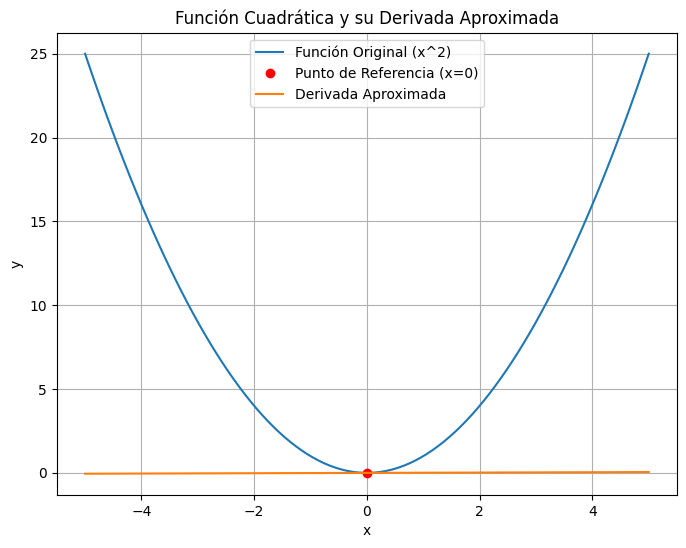

In [58]:
# Calcular los valores de la función original
y = my_func(x)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Función Original (x^2)')
plt.plot(x_ref, my_func(x_ref), 'ro', label=f'Punto de Referencia (x={x_ref})')
plt.plot(x, grafico_derivada_puntual, label='Derivada Aproximada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función Cuadrática y su Derivada Aproximada')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

## Regla de la cadena

Se utiliza cuando derivamos composicion de funciones. La composicion de funcion es cuando anidamos funciones, es decir aplicamos sucesivas veces una o varias funciones.

Ej:
    
$f(x) = x + 1$

$g(u) = u^2$

Nosotros sabemos que las derivadas de $f$ y $g$ son dadas por: 

$f'(x) = 1$

$g'(u) = 2u$

Si tenemos que $u = f(x) = x +1$ entonces:

$g(u) = g(f(x)) = (x + 1)^2 $

(Definición 2) Ahora $g$ depende de $f$ y de $x$, entonces se define la derivada de la función compuesta $g$ por: 

$\begin{equation}\dfrac{dg(x)}{dx} = g(f(x))' \cdot f(x)'\end{equation} \quad \text{(Regla de la Cadena)}$ 

Luego, sustituimos las derivadas que calculamos previamente para cada función en la ecuación (1),
recordando que $u = (x+1)$

$\dfrac{dg(x)}{dx} = 2 \cdot u \cdot 1 = 2 \cdot (x + 1) \cdot 1$


Analicemos los resultaados numéricamente!

In [62]:
def my_func_1(x: np.array)->np.array:
    return x + 1
def my_func_2(x: np.array)->np.array:
    return my_func_1(x)**2
def derivada(my_func:np.array,x_ref: int,h: np.float64)->np.array:
    return (my_func(x_ref+h)- my_func(x_ref))/h

In [68]:
f = my_func_1(x)
g = my_func_2(f)

# Definir el rango de valores de x
x = np.linspace(-5, 5, 100)

# Elegir un punto de referencia x
x_ref = 0

# Calcular la derivada en ese punto con un valor de h
h = 0.01

derivative_result = derivada(my_func_2, x_ref, h)

# Ecuacion de la recta tangete al punto donde calculamos la aproximacion de la deriada :D
grafico_derivada_puntual = my_func_2(x_ref) + derivative_result*(x-x_ref)

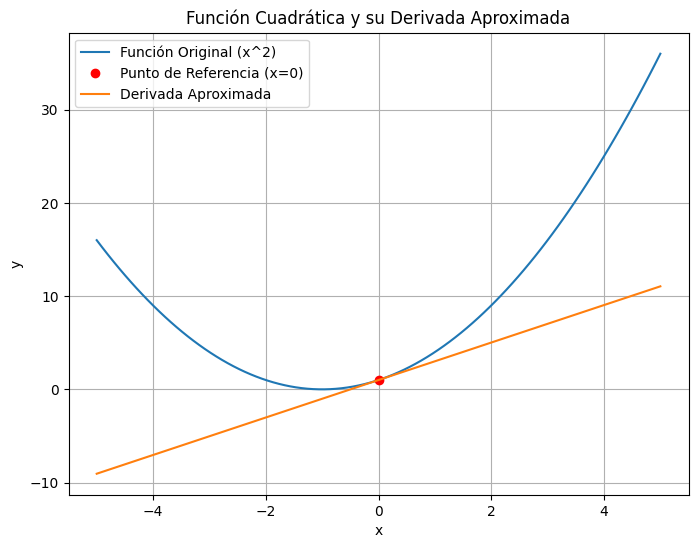

In [69]:
# Calcular los valores de la función original
y = my_func_2(x)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Función Original (x^2)')
plt.plot(x_ref, my_func_2(x_ref), 'ro', label=f'Punto de Referencia (x={x_ref})')
plt.plot(x, grafico_derivada_puntual, label='Derivada Aproximada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función Cuadrática y su Derivada Aproximada')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

3. Definición: Derivada parcial. Es análoga a la definciión de derivada en una variable, pero ahora $f$ es una función de más de una variable. 


$
\dfrac{\partial f(x,y)}{\partial x} = f'(x,y)_{x} = \displaystyle{\lim_{x \to 0}} \dfrac{f(x + h,y) - f(x,y)}{h}
$


observe el siguiente [link](https://www.geogebra.org/m/K3xnQRY8) con una explicación visual de las derivadas parciales. Es decir estamos calculando la derivada en una curva o trayectoria de la función de dos variables. Esto se extrapola a funciones de $n$ variables (pero ya no podemos tener una representación gráfica debido a la alta dimensión)

## Gradiente

Es una generalización de las derivadas revisadas anteriormente. 
El gradiente es un operador $\nabla f: \mathbb{R}^{n}\rightarrow \mathbb{R}^{n}$ es decir transforma un vector en un vector. Se deriva una función de entrada para cada una de las variables que posea y se evalúa en el punto $p=(x_1,x_2,\dots,x_n)$. Explícitamente esta dado por: 

$
\nabla f(p) = 
\begin{bmatrix}
\dfrac{\partial f}{\partial x_{1}} \\[0.3cm]
\dfrac{\partial f}{\partial x_{2}} \\[0.3cm]
\vdots \\[0.3cm]
\dfrac{\partial f}{\partial x_{n}}\\[0.3cm]
\end{bmatrix}
$

esta notación puede cambiar y muchas veces veremos escrito el gradiente, por ejemplo en dos o tres dimensiones, de la siguiente forma:


$
\nabla f(p) = \dfrac{\partial f}{\partial x} \mathbf{i} + \dfrac{\partial f}{\partial y} \mathbf{j} \quad \text{2D}
$

$
\nabla f(p) = \dfrac{\partial f}{\partial x} \mathbf{i} + \dfrac{\partial f}{\partial y} \mathbf{j} + + \dfrac{\partial f}{\partial z} \mathbf{k}  \quad \text{3D}
$

donde $\mathbf{i}$,$\mathbf{j}$, $\mathbf{k}$ son vectores unitarios, correspondientes a 2 o 3 dimensiones según corresponda.

$f$ debe ser diferenciable en $p$. Este vector gradiente tiene relación con las derivadas direccionales (que no utilizaremos en el curso) y toma la dirección de máximo crecimiento de la curva $f$, por esta razón la utilizaremos para optimizar función, pues si avanzamos en la dirección contraria al máximo crecimiento pues tenemos al menos un criterio para encontrar mínimos locales o globales. 

Observemos los vectores de gradiente para la función


$f(x,y) = z = x^{2}+y^{2}$  


usando python!

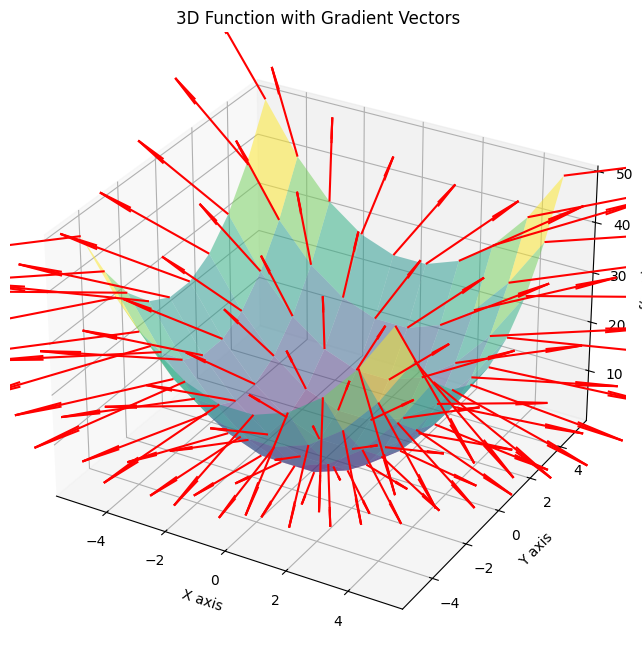

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return x**2 + y**2

# Define the gradient
def gradient(x, y):
    return 2*x, 2*y

# Create a grid of points
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
x, y = np.meshgrid(x, y)

# Calculate function values
z = f(x, y)

# Calculate gradient vectors
gx, gy = gradient(x, y)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5, cmap='viridis')

# Add gradient vectors (as arrows)
ax.quiver(x, y, z, gx, gy, 0, length=0.5, color='red')

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Function with Gradient Vectors')

plt.show()

observe que todos los vectores apuntan en la dirección de máximo crecimiento. Si esta función representara el error cometido por algo y los ejes $x$ e $y$ fueran dos parámetros que podemos ajustar, intentaríamos hallar el par $(x,y)$ que minimiza el error, este par es justamente un valor en el sentido contrario de estos vectores y que fácilmente podemos observar como el punto $(0,0)$, siendo un mínimo global!

## Minimización en 1D